# Example 1, Lindeborgs Gård : analysing scenarios

In this notebook, we analyse the results and plot figures and tables present in the manuscript

Some imports...

In [6]:
import os

import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import matplotlib.pylab as plt

from scipy import stats
from adjustText import adjust_text

Some variables...

In [9]:
# absolute folder path
afp = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2_farm_biochar'
# example folder name
ex = '/ex1_Lindeborg'

# log file
a = afp+ex+'/output_files/filelog.csv'

A function...

In [7]:
def read_feature(df, slt, feat='biochar production'):
    df.sort_values('scenario_name', inplace=True)
    y1 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains(feat)].value)
    
    x11 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("pyrBMC") & df['feature'].str.contains("heat produced")].value)
    x12 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("el. heater heat produced")].value)
    x13 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("hp heat produced")].value)
    #print(len(x13)-len(x12))
    x1 = (x11+x12)/1000 if len(x13)-len(x12) else (x11+x12+x13)/1000
    return x1, y1

## Simulation A) Biochar potential

### Figure

In [11]:
#import df
df = pd.read_csv(a, sep = ',', decimal = '.', parse_dates=True)

# sorting
df.sort_values('scenario_name', inplace=True)

slt = 'addConstraints_loop_2'
x1, y1 = read_feature(df, 'addConstraints_loop_2', 'biochar production') 

month = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("TimeInUse_month_pyrBMC60")].value)
load  = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("Load_average_pyrBMC60")].value)
load

txt = df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("biochar")].scenario_name
txt = pd.DataFrame(txt.str.split('_')).reset_index()
txt.loc[1].scenario_name[4]


'2001'

6.981497482026629
4.901305622796834


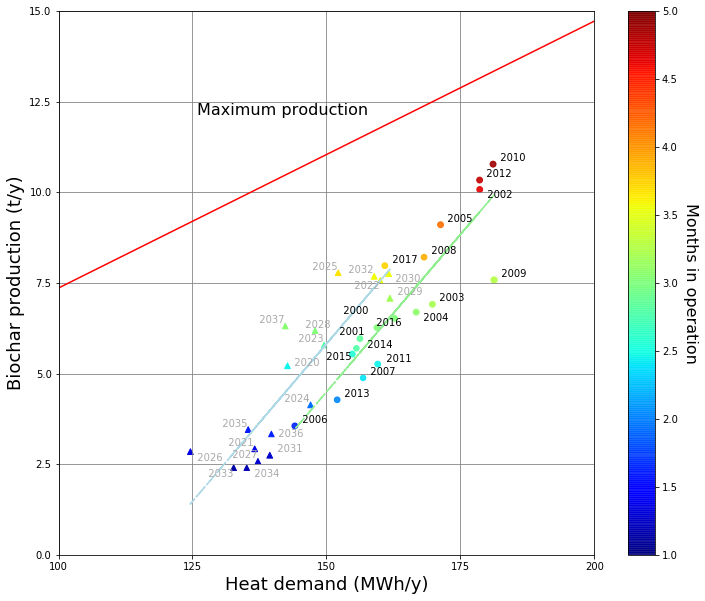

In [16]:
#import df
a = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/'+'results/logfile.csv'
df = pd.read_csv(a, sep = ',', decimal = '.', parse_dates=True)
# sorting
df.sort_values('scenario_name', inplace=True)

slt = 'BioMaCon50kW_PL5MO7MWh186_loop_2' # 'BioMaCon60t_biyear_loop'
x1, y1 = read_feature(df, slt, 'biochar production') 
month = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("TimeInUse_month_pyrBMC50t")].value)
load  = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("Load_average_pyrBMC50t")].value)
print(stats.describe(y1)[2]) #mean
txt = df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("biochar")].scenario_name
txt = pd.DataFrame(txt.str.split('_')).reset_index()

fig, ax = plt.subplots(figsize=(12,10)) 

min_ops= 1
max_ops= 5

# SET 1
fig = plt.scatter(x1, y1, c=month, s=load, alpha=0.9, cmap='jet', vmin=min_ops, vmax=max_ops)           
cbar = plt.colorbar();  # show color scale
cbar.set_label('Months in operation', rotation=270, fontsize=16, labelpad=20)

b, m = polyfit(x1, y1, 1)
plt.plot(x1, b + m * x1, '-.', c='lightgreen')

texts_0 = [ax.annotate('  '+txt.loc[i].scenario_name[6], (x1[i], y1[i]) ) for i in range(len(x1))]   
#adjust_text(texts_0)
texts_1, texts_2, texts_3 = [], [],[]

yup = True
if yup:
    # SET 2 - 
    slt = 'BioMaCon50kW_PL5MO7MWh186_loop_cc20-15-15-125_' # 'BioMaCon60t_biyear_loop'
    x1, y1 = read_feature(df, slt, 'biochar production') 
    month = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("TimeInUse_month_pyrBMC50t")].value)
    load  = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("Load_average_pyrBMC50t")].value)
    print(stats.describe(y1)[2]) #mean
    txt = df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("biochar")].scenario_name
    txt = pd.DataFrame(txt.str.split('_')).reset_index()

    plt.scatter(x1, y1, c=month, s=load, cmap='jet', marker='^',vmin=min_ops, vmax=max_ops)           
    #cbar = plt.colorbar();  # show color scale
    #cbar.set_label('Months in operation', rotation=270, fontsize=16, labelpad=20)
    texts_1 = [ax.annotate('  '+str(int(txt.loc[i].scenario_name[6])+20), (x1[i], y1[i]), color='darkgrey' ) for i in range(len(x1))]   
    #adjust_text(texts_1)

    b, m = polyfit(x1, y1, 1)
    plt.plot(x1, b + m * x1, '-.', c='lightblue')

yup = False
if yup:
    # SET 3 - 
    slt = 'BioMaCon70kW40PL_biyear_newBoverket_loop' # 'BioMaCon60t_biyear_loop'
    x2, y2 = read_feature(df, slt, 'biochar production') 
    month = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("TimeInUse_month_pyrBMC70t")].value)
    load  = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("Load_average_pyrBMC70t")].value)
    print(stats.describe(y2)[2]) #mean
    txt = df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("biochar")].scenario_name
    txt = pd.DataFrame(txt.str.split('_')).reset_index()

    plt.scatter(x1, y2, c=month, s=load, alpha=0.9, cmap='Pastel2', marker='^')           
    cbar = plt.colorbar();  # show color scale
    cbar.set_label('Months in operation', rotation=270, fontsize=16, labelpad=20)
    texts_3 = [ax.annotate('  '+txt.loc[i].scenario_name[6], (x1[i], y2[i]), color='grey' ) for i in range(len(x1))]   
    #adjust_text(texts_3)

    b, m = polyfit(x1, y2, 1)
    plt.plot(x1, b + m * x1, '-.', c='lightblue')

    
# SET MAX PRODUCTION
# BC = HeatDemand (MWh)* PlantBiocharHeatRatio (kg/kWh) 
# with plant 60 kW heat; full capacity, 80% max uptime: 0.80*8760h*31kW = 217 MWh * 0.1439820022 = 60 t bc
R_bc_ht = 0.07362716 # kg biochar / kWh heat (for plant pyrBMC60)
x0 = np.array([0,0.8*8760*50/1000]) # 50kW
fig = plt.plot(x0, x0*R_bc_ht, '-', c='red')
texts_4=[ax.annotate('Maximum production', (125, 12), fontsize=16 )]


plt.xlabel("Heat demand (MWh/y)", fontsize=18)
plt.ylabel("Biochar production (t/y)", fontsize=18)

xlim, dx =[100,200], 25
ylim, dy =[0,15], 2.5
major_ticks = np.arange(0, xlim[1]+dy, dx)
ax.set_xticks(major_ticks)

major_ticks = np.arange(0, ylim[1]+dy, dy)
ax.set_yticks(major_ticks)
# And a corresponding grid
ax.grid(which='both')
ax.grid(True, color='grey')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#texts_0#+texts_4 #texts_1+texts_2+texts_3
adjust_text(texts_0+texts_1+texts_2+texts_3+texts_4)


plt.savefig('results/conf_pot_2.png', dpi=300, bbox_inches='tight')
plt.show()


In [15]:
# Polyfit for each set data point
# return b, m : 
# b = intercept at 0 (no physical meaning); 
# m = slope in t biochar / MWh heat ; 
# to be compared with slope of max potential ? Slope of real and cc is higher; what does it mean? 
[polyfit(x, y, 1) for (x,y) in [(x1,y1),(x2,y2),(x3,y3)]]


[array([-13.74566597,   0.2153406 ]),
 array([-16.29270738,   0.25728331]),
 array([-20.89595674,   0.30391059])]

### Table

In [8]:
#import df
df = pd.read_csv(a, sep = ',', decimal = '.', parse_dates=True)

In [10]:
def read_single_feature(df, slt, feat='biochar production'):
    df.sort_values('scenario_name', inplace=True)
    y = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains(feat)].value)
    return y

def read_feature2(df, slt, feat='biochar production'):
    df.sort_values('scenario_name', inplace=True)
    y1 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains(feat)].value)
    
    x11 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("pyrBMC") & df['feature'].str.contains("heat produced")].value)
    x12 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("el. heater heat produced")].value)
    x13 = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains("hp heat produced")].value)
    x1 = (x11+x12)/1000 if len(x13)-len(x12) else (x11+x12+x13)/1000
    return x1, y1

In [10]:
y = read_single_feature(df, slt='addConstraints_loop_2', feat='biochar production')
stats.describe(y)

DescribeResult(nobs=19, minmax=(5.376321039204648, 12.61724187648551), mean=8.48593297886755, variance=2.9441790694151324, skewness=0.3695665766515138, kurtosis=0.1848120314499342)

In [11]:
scen_list = ['BioMaCon50kW_PL5MO7MWh186_loop_2',
             'BioMaCon50kW_PL5MO3MWh186_loop_2',
             'BioMaCon50kW_PL3MO7MWh186_loop_2',
             'BioMaCon50kW_PL5MO7MWh186_loop_cc20-15-15-125_']

feat_list = ['biochar production', 
             'Load_average_pyrBMC',
             'TimeInUse_month_pyrBMC50t','TimeInUse_month_hp', 'TimeInUse_month_el. heater',
             'pyrBMC50t elec input','hp elec input', 'el. heater elec input']

In [12]:
paper_df = pd.DataFrame({})
for f in feat_list:
    dic = {}
    for s in scen_list:
        y = read_single_feature(df, slt=s, feat=f)
        if 'elec input' in f:
            y=y/1000
        q = stats.describe(y) if len(y) > 0 else []
        t = ("%.2f" % q[1][0],"%.2f" % q[2],"%.2f" % q[1][1], "%.2f" % np.sqrt(q[3])) if len(y) > 0 else '-'
        dic[s]=t
    paper_df[f]=dic.values()

dic = {}
for s in scen_list:
    x,y = read_feature2(df, slt=s, feat='biochar production')
    q = stats.describe(x) if len(x) > 0 else []
    t = ("%.2f" % q[1][0],"%.2f" % q[2],"%.2f" % q[1][1], "%.2f" % np.sqrt(q[3])) if len(y) > 0 else '-'
    dic[s]=t
#dic['vinnova_loop_2']=dic['addConstraints_loop_2']
paper_df['Heat demand']=dic.values()    
    
paper_df['index']=dic.keys()
paper_df.set_index('index', inplace=True)

In [13]:
paper_df.transpose()

index                      BioMaCon50kW_PL5MO7MWh186_loop_2  \
biochar production                (3.56, 6.98, 10.78, 2.10)   
Load_average_pyrBMC             (30.54, 33.68, 38.67, 1.90)   
TimeInUse_month_pyrBMC50t          (1.64, 3.25, 4.89, 0.93)   
TimeInUse_month_hp                (7.08, 8.73, 10.33, 0.94)   
TimeInUse_month_el. heater        (7.31, 8.81, 10.36, 0.90)   
pyrBMC50t elec input               (2.90, 5.69, 8.78, 1.71)   
hp elec input                   (11.80, 16.59, 20.00, 2.73)   
el. heater elec input            (5.77, 15.90, 23.70, 5.24)   
Heat demand                 (144.11, 164.33, 181.30, 10.81)   

index                      BioMaCon50kW_PL5MO3MWh186_loop_2  \
biochar production                (5.12, 7.94, 10.97, 1.77)   
Load_average_pyrBMC             (30.17, 32.99, 36.48, 1.67)   
TimeInUse_month_pyrBMC50t          (2.43, 3.73, 4.98, 0.76)   
TimeInUse_month_hp                 (6.98, 8.25, 9.54, 0.77)   
TimeInUse_month_el. heater         (7.11, 8.33, 9.57, 0.72)   
pyrBMC50t elec input               (4.17, 6.47, 8.94, 1.44)   
hp elec input                   (11.50, 15.21, 18.59, 2.27)   
el. heater elec input            (5.00, 11.40, 17.67, 3.39)   
Heat demand                 (144.11, 164.33, 181.30, 10.81)   

index                      BioMaCon50kW_PL3MO7MWh186_loop_2  \
biochar production               (8.67, 10.93, 12.85, 1.04)   
Load_average_pyrBMC             (25.17, 28.26, 32.13, 1.90)   
TimeInUse_month_pyrBMC50t          (5.28, 6.38, 7.15, 0.46)   
TimeInUse_month_hp                 (4.82, 5.59, 6.69, 0.46)   
TimeInUse_month_el. heater         (5.11, 5.68, 6.72, 0.44)   
pyrBMC50t elec input              (7.07, 8.90, 10.47, 0.85)   
hp elec input                     (5.49, 7.64, 10.46, 1.42)   
el. heater elec input              (0.02, 0.92, 2.13, 0.59)   
Heat demand                 (144.11, 164.33, 181.30, 10.81)   

index                      BioMaCon50kW_PL5MO7MWh186_loop_cc20-15-15-125_  
biochar production                               (2.40, 4.90, 7.78, 2.12)  
Load_average_pyrBMC                           (29.98, 32.69, 36.10, 1.65)  
TimeInUse_month_pyrBMC50t                        (1.15, 2.31, 3.67, 0.98)  
TimeInUse_month_hp                              (8.30, 9.66, 10.82, 0.98)  
TimeInUse_month_el. heater                      (8.30, 9.70, 10.82, 0.96)  
pyrBMC50t elec input                             (1.96, 3.99, 6.34, 1.73)  
hp elec input                                 (13.46, 17.61, 21.31, 2.79)  
el. heater elec input                          (8.52, 16.78, 23.68, 4.74)  
Heat demand                               (124.61, 144.72, 161.85, 10.91)

### Elecricity correlation

In [55]:
#import df
df = pd.read_csv(a, sep = ',', decimal = '.', parse_dates=True)
# select scen & features
scen_list = ['BioMaCon50kW_PL5MO7MWh186_loop_cc20-15-15-125_',] 
#BioMaCon50kW_PL5MO7MWh186_loop_2
#BioMaCon50kW_PL5MO7MWh186_loop_cc20-15-15-125_
feat_list = ['biochar production', 
             'pyrBMC50t elec input','hp elec input', 'el. heater elec input']
paper_df = pd.DataFrame({})
for s in scen_list:
    dic = {}
    for f in feat_list:
        y = read_single_feature(df, slt=s, feat=f)
        if 'elec input' in f:
            y=y/1000
        dic[f]=y
    
    x,y = read_feature2(df, slt=s, feat='biochar production')  
    dic['heat demand']=x
    #paper_df[s]=dic.values()

In [57]:
dic['total elec input'] = (dic['pyrBMC50t elec input']+
                                 dic['hp elec input']+
                                 dic['el. heater elec input'])

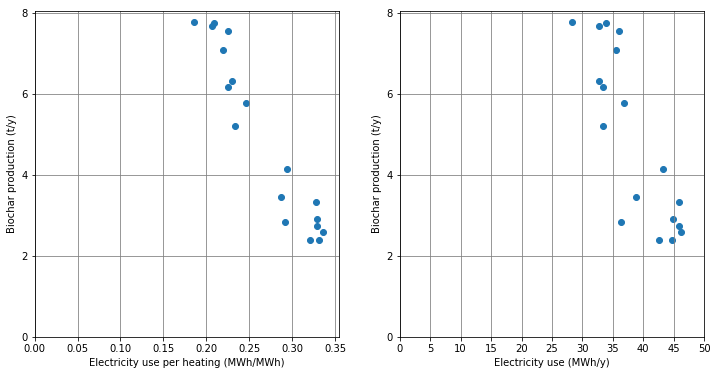

In [59]:
fig, ax  = plt.subplots(1,2, figsize=(12,6))

i=0
ax[i].scatter(dic['total elec input']/dic['heat demand'],dic['biochar production'])

major_ticks = np.arange(0,max(dic['total elec input']/dic['heat demand'])+0.05, 0.05)
ax[i].set_xticks(major_ticks)
major_ticks = np.arange(0, max(dic['biochar production'])+1, 2)
ax[i].set_yticks(major_ticks)
ax[i].grid(which='both')
ax[i].grid(True, color='grey')
ax[i].set(xlabel='Electricity use per heating (MWh/MWh)', ylabel='Biochar production (t/y)')

i=1
ax[i].scatter(dic['total elec input'],dic['biochar production'])

major_ticks = np.arange(0,max(dic['total elec input'])+5, 5)
ax[i].set_xticks(major_ticks)
major_ticks = np.arange(0, max(dic['biochar production'])+1, 2)
ax[i].set_yticks(major_ticks)
ax[i].grid(which='both')
ax[i].grid(True, color='grey')
ax[i].set(xlabel='Electricity use (MWh/y)', ylabel='Biochar production (t/y)')    


plt.show()

### Sizing comparison

In [117]:
#import df
df = pd.read_csv(a, sep = ',', decimal = '.', parse_dates=True)

x, y, z = [read_single_feature(df, slt='BioMaCon30kW40PL_biyear_newBoverket_loop', feat='biochar production'),
           read_single_feature(df, slt='BioMaCon50kW40PL_biyear_newBoverket_loop', feat='biochar production'),
           read_single_feature(df, slt='BioMaCon70kW40PL_biyear_newBoverket_loop', feat='biochar production')]

stats.describe(x),stats.describe(y),stats.describe(z)


(DescribeResult(nobs=19, minmax=(6.63410472741172, 9.533904573519862), mean=8.286394625622671, variance=0.4972496221780021, skewness=-0.4037272482828141, kurtosis=0.10977663753834),
 DescribeResult(nobs=18, minmax=(2.939849507467448, 8.951982767137633), mean=5.837505604092416, variance=2.977747420255464, skewness=0.29700415332208197, kurtosis=-0.786801481700794),
 DescribeResult(nobs=18, minmax=(0.0, 4.4770040654803696), mean=1.509212036939777, variance=1.8378106468999036, skewness=0.9825137938251194, kurtosis=-0.12519575797303784))

## Simulation B) Comparative LCA

In [14]:
import sys, os, re
# add module directory to system path, relative
sys.path.insert(0, os.path.join('..', 'farm_biochar_model'))
# add module directory to system path, absolute
sys.path.insert(0, os.path.join(os.getcwd(),'..', 'farm_biochar_model')) 

# import components of farm_biochar_model
import lcopt_multi_tagged as lmt # for re-grouping of LCA result according to tags
import brightway2 as bw2

In [15]:
lmt.multi_aggregate_tagged_graph

<function lcopt_multi_tagged.multi_aggregate_tagged_graph(graph)>

In [16]:
proj = 'cs1_Lindeborgs'
bw2.projects.set_current(proj) if proj in bw2.projects else print("Project does not exist")
fg_db = 'farmEnergySystem'

### LCIA selection

In [19]:
IPCC = [method for method in bw2.methods if "IPCC 2013" in str(method) 
        and "GWP 100" in str(method) 
        and "LT" not in str(method)
        and "V1" not in str(method)]

ILCDs = [method for method in bw2.methods if "ILCD 2.0" in str(method) 
        and "LT" not in str(method)
        and "V1" not in str(method)
        and "climate change" not in str(method)]

methods = ILCDs.copy()
methods.append(IPCC[0])
method_units = [bw2.methods[method]['unit'] for method in methods]
method_units[0] = r'mol $H^{+}$-Eq'
method_units[6] = r'kg $U_235$-Eq'
method_units[-5] = r'$m^3$ water'
method_units[-1] = r'kg $CO_2$-Eq'
methods, method_units

([('ILCD 2.0 2018 midpoint',
   'ecosystem quality',
   'freshwater and terrestrial acidification'),
  ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater ecotoxicity'),
  ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater eutrophication'),
  ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'marine eutrophication'),
  ('ILCD 2.0 2018 midpoint',
   'ecosystem quality',
   'terrestrial eutrophication'),
  ('ILCD 2.0 2018 midpoint', 'human health', 'carcinogenic effects'),
  ('ILCD 2.0 2018 midpoint', 'human health', 'ionising radiation'),
  ('ILCD 2.0 2018 midpoint', 'human health', 'non-carcinogenic effects'),
  ('ILCD 2.0 2018 midpoint', 'human health', 'ozone layer depletion'),
  ('ILCD 2.0 2018 midpoint', 'human health', 'photochemical ozone creation'),
  ('ILCD 2.0 2018 midpoint',
   'human health',
   'respiratory effects, inorganics'),
  ('ILCD 2.0 2018 midpoint', 'resources', 'dissipated water'),
  ('ILCD 2.0 2018 midpoint', 'resources', 'fossils'),
  ('ILCD 2.0 2

### FU definition

In [45]:
act = [a['name'] for a in bw2.Database(fg_db)
       if "farmEnergy_cpLCA_50kW_PL5MO7MWh186_B" in str(a)
       and not "loop" in str(a)
      and not "PyrEl" in str(a)
      ] 
act

['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B6_el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B5_GSHP30_el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B4_Comb-HP-el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B3_Pyr30-HP-el_2017']

In [46]:
act.sort()
act
fus = [ {(fg_db, x):1} for x in act]
fus

[{('farmEnergySystem',
   'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_2017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B3_Pyr30-HP-el_2017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B4_Comb-HP-el_2017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B5_GSHP30_el_2017'): 1},
 {('farmEnergySystem', 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B6_el_2017'): 1}]

In [29]:
fu = {(fg_db, 'farmEnergy_addConstraints'):1}
fu

{('farmEnergySystem', 'farmEnergy_addConstraints'): 1}

### Graph traversal calculations

In [58]:
result_sets = []
result_pds = pd.DataFrame()
# loop on FUs
for fu in fus:
    #lci, lcia
    scores = []
    for n, m in enumerate(methods):
        if n == 0:
            lca = bw2.LCA(fu, m)
            lca.lci()
            lca.lcia()
        else:
            lca.switch_method(m)
            lca.redo_lcia(
            )
        scores.append(lca.score)
    scores
    
    #graph traversal
    multi_foreground_result, multi_foreground_graph = analysis.multi_traverse_tagged_databases(fu, methods, 
                                                                                      label="tag", default_tag="other", 
                                                                                      secondary_tags=[])

    recursed_graph = analysis.get_cum_impact(analysis.deepcopy(multi_foreground_graph[0]))
    dropped_graph = analysis.drop_pass_through_levels(analysis.deepcopy(multi_foreground_graph[0]))
    mass_flow = analysis.recurse_mass(multi_foreground_graph[0], True)

    result_set = {
            'methods': [str(method) for method in methods],
            'units': method_units,
            'scores': scores,
            'foreground_results': multi_foreground_result,
            'graph': recursed_graph,
            'dropped_graph': dropped_graph,
        }

    result_sets.append(result_set)

    result_pd = pd.DataFrame.from_dict(multi_foreground_result)
    
    result_pd['Impact'] = [str(method) for method in methods]
    result_pd['Units'] = method_units
    result_pd['Scenario'] = np.repeat(list(fu.items())[0][0][1], len(method_units))
   
    result_pds = result_pds.append(result_pd, sort=False) # works even if not same axis (different tags)
    
result_pds

other  Carbon sequestration  Plant emissions  Process electricity  \
0       0             -0.000000        52.951783             4.553333   
1       0             -0.000000         0.000000           601.344080   
2       0             -0.000000         0.000000             0.352353   
3       0             -0.000000        27.835464             1.212843   
4       0             -0.000000       304.830532            11.042461   
5       0             -0.000000         0.000000             0.000019   
6       0             -0.000000         0.000000          7626.565610   
7       0             -0.000000         0.000000             0.000280   
8       0             -0.000000         0.000000             0.000523   
9       0             -0.000000        71.609513             2.572217   
10      0             -0.000000         0.000952             0.000050   
11      0             -0.000000         0.000000          3824.040904   
12      0             -0.000000         0.000000        119924.023558   
13      0             -0.000000         0.000000        108034.693698   
14      0             -0.000000         0.000000             0.002299   
15      0         -20047.473688         1.859302           882.531377   
0       0             -0.000000        52.951783             1.792154   
1       0             -0.000000         0.000000           210.640905   
2       0             -0.000000         0.000000             0.136914   
3       0             -0.000000        27.835464             0.446825   
4       0             -0.000000       304.830532             4.385022   
5       0             -0.000000         0.000000             0.000006   
6       0             -0.000000         0.000000          2331.410582   
7       0             -0.000000         0.000000             0.000111   
8       0             -0.000000         0.000000             0.000167   
9       0             -0.000000        71.609513             0.996603   
10      0             -0.000000         0.000952             0.000018   
11      0             -0.000000         0.000000          1078.191437   
12      0             -0.000000         0.000000         37719.808429   
13      0             -0.000000         0.000000         45621.972854   
..    ...                   ...              ...                  ...   
2       0                   NaN              NaN             0.683139   
3       0                   NaN              NaN             2.309585   
4       0                   NaN              NaN            21.713801   
5       0                   NaN              NaN             0.000034   
6       0                   NaN              NaN         13513.654349   
7       0                   NaN              NaN             0.000551   
8       0                   NaN              NaN             0.000943   
9       0                   NaN              NaN             5.002674   
10      0                   NaN              NaN             0.000094   
11      0                   NaN              NaN          6563.202850   
12      0                   NaN              NaN        214674.590665   
13      0                   NaN              NaN        218680.835649   
14      0                   NaN              NaN             0.004041   
15      0                   NaN              NaN          1729.897623   
0       0                   NaN              NaN                  NaN   
1       0                   NaN              NaN                  NaN   
2       0                   NaN              NaN                  NaN   
3       0                   NaN              NaN                  NaN   
4       0                   NaN              NaN                  NaN   
5       0                   NaN              NaN                  NaN   
6       0                   NaN              NaN                  NaN   
7       0                   NaN              NaN                  NaN   
8       0                   NaN              NaN              

In [73]:
result_pds.loc[:,result_pds.columns.difference(['Impact','Units'])][result_pds['Impact'].str.contains('GWP')].sum(axis=1)

15   -11855.675819
15   -10317.661380
15   -15226.938979
15     5135.508904
15     2649.353860
15     7697.824806
dtype: float64

In [34]:
result_pds.loc[:,['Scenario']][result_pds['Impact'].str.contains('GWP')].values

array([['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_2017'],
       ['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017'],
       ['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B3_Pyr30-HP-el_2017'],
       ['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B4_Comb-HP-el_2017'],
       ['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B5_GSHP30_el_2017'],
       ['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B6_el_2017']], dtype=object)

### Figure

C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


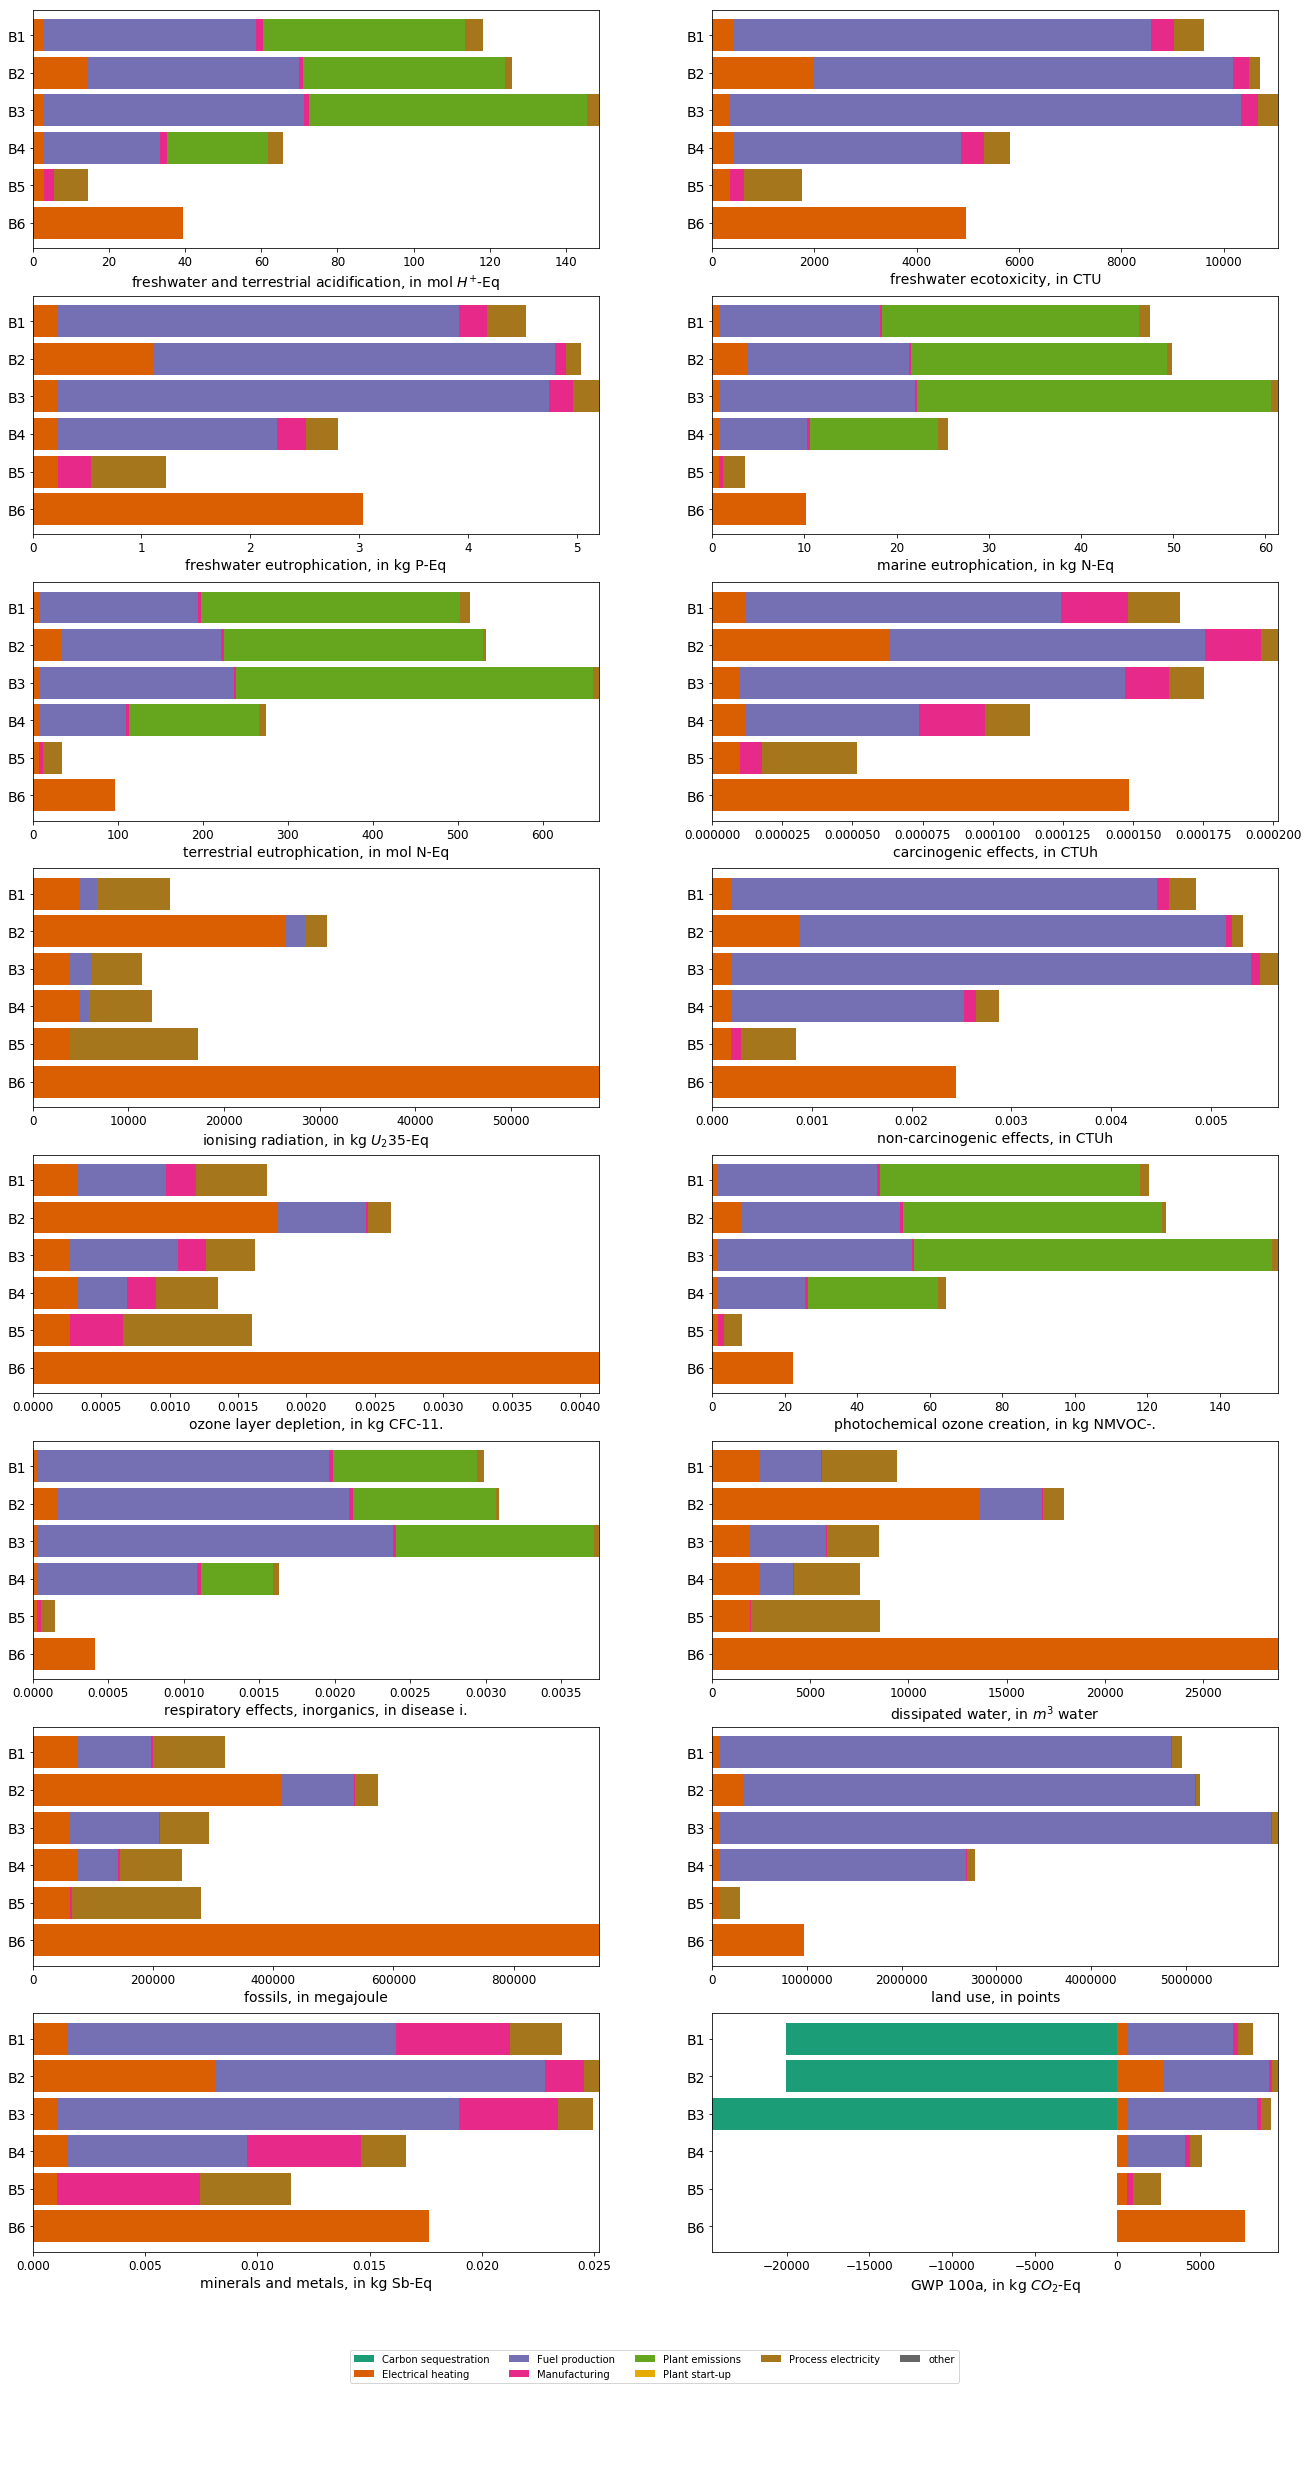

In [64]:
#paper_name =['PyrolysisBoosted (hp)', 'Electrical heating' ,'Pyrolysis (el)','Combustion (hp)','Pyrolysis (hp)' ] # act #
#paper_name = ['COMB x HP', 'ELEC','PYR x HP']
paper_name = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']
n_col = 2
fig, axs = plt.subplots(int(len(methods)/n_col),n_col, 
                        figsize=(20,4.5*int(len(methods)/n_col)),
                        sharex=False)
method_name_unit = [methods[x][2]+', in '+method_units[x] for x in range(len(methods))]
i=0
for m in methods:
    r = i//n_col
    c = i%n_col
    m = str(m)
    # remove non result columns, and filter by impact category m
    tmp = result_pds.loc[:,result_pds.columns.difference(['Impact','Scenario','Units'])][result_pds['Impact'].str.contains(m)]
    plus = tmp[tmp>=0].sum(axis=1)
    moins = tmp[tmp<0].sum(axis=1)
    tmp.plot(kind='barh', stacked=True, ax=axs[r,c],
            colormap='Dark2', # viridis Pastel2 Paired tab20c
            xlim=(min(moins),max(plus)),#to change
            rot=0,
            width=0.85)
    axs[r,c].set_xlabel(method_name_unit[i], fontsize=14)
    axs[r,c].tick_params(axis='x', which='major', labelsize=12)
    axs[r,c].set_yticklabels(paper_name, fontsize=14)
    
    axs[r,c].set_ylim(axs[r,c].get_ylim()[::-1])
    
    axs[r,c].legend().set_visible(False)
    #tmp = pd.DataFrame()
    i=i+1

handles, labels = axs[(i-1)//n_col,(i-1)%n_col].get_legend_handles_labels()
fig.legend(handles, labels, 
           #bbox_to_anchor=(0.06, 0.79, 0.75, 0.1), 
           loc='lower center',         
           ncol=5, 
           #mode="expand", 
           borderaxespad=10)
plt.subplots_adjust(top=0.99, right=0.99)

plt.savefig('simB_LCIA_all.png', dpi=300)

### [old] Re-run bw2-graph writing with tags/emissions

In [13]:
ficus_result_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/results'
ficus_file = 'cs1_Lindeborgs_'
#ficus_scenario = scenario+'.xlsx'
year='2018'
tb = 3600*24
p2e=tb/3600
fg_db = "farmEnergySystem"
proj="cs1_Lindeborgs"
ficus_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/'+'excel_input_runs/'


list_to_rerun = ['vinnova_comb2018', 'vinnova_el_2018','vinnova_BioGreen2018', 'addConstraints']

ofInterest_dict = {
    'vinnova_comb2018':['comb', 'el. heater'],
    'vinnova_el_2018':['el. heater'],
    'vinnova_BioGreen2018':['BioGreen60', 'el. heater'],
    'addConstraints':['pyrBMC60', 'hp', 'el. heater']
} # ['comb', 'el. heater'] ['pyr-el', 'el. heater']




Compile ficus lci and lcia
3.7488069606554015 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
## bw2 Calculate apparent mix for ... comb
## bw2 Calculate apparent mix for ... el. heater
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 07/11/2019 09:54:44
  Finished: 07/11/2019 09:54:46
  Total time elapsed: 00:00:01
  CPU %: 61.50
  Memory %: 1.79
Scenario  vinnova_comb2018  is now ready for analysis in Activity-Browser
Compile ficus lci and lcia
4.696659019605137 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
## bw2 Calculate apparent mix for ... el. heater
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 07/11/2019 09:55:18
  Finished: 07/11/2019 09:55:20
  Total time elapsed: 00:00:01
  CPU %: 65.50
  Memory %: 1.92
Scenario  vinnova_el_2018  is now ready for analysis in Activity-Browser
Biochar produced annually:  biochar_production    12.030359
dtype: float64  tons
Compile ficus lci and lcia
-20.156550664046243 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
## bw2 Calculate apparent mix for ... BioGreen60
## bw2 Calculate apparent mix for ... el. heater
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 07/11/2019 09:55:55
  Finished: 07/11/2019 09:55:57
  Total time elapsed: 00:00:01
  CPU %: 66.40
  Memory %: 2.19
Scenario  vinnova_BioGreen2018  is now ready for analysis in Activity-Browser
Biochar produced annually:  biochar_production    10.484286
dtype: float64  tons
Compile ficus lci and lcia
-19.592247963327 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
## bw2 Calculate apparent mix for ... pyrBMC60
## bw2 Calculate apparent mix for ... hp
## bw2 Calculate apparent mix for ... el. heater
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


Title: Writing activities to SQLite3 database:
  Started: 07/11/2019 09:56:50
  Finished: 07/11/2019 09:56:52
  Total time elapsed: 00:00:02
  CPU %: 73.80
  Memory %: 2.47
Scenario  addConstraints  is now ready for analysis in Activity-Browser


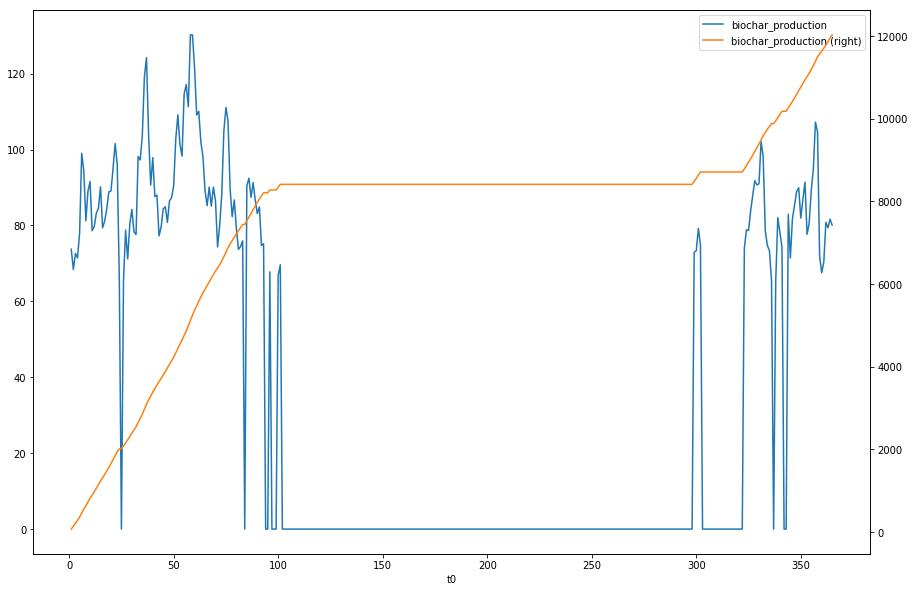

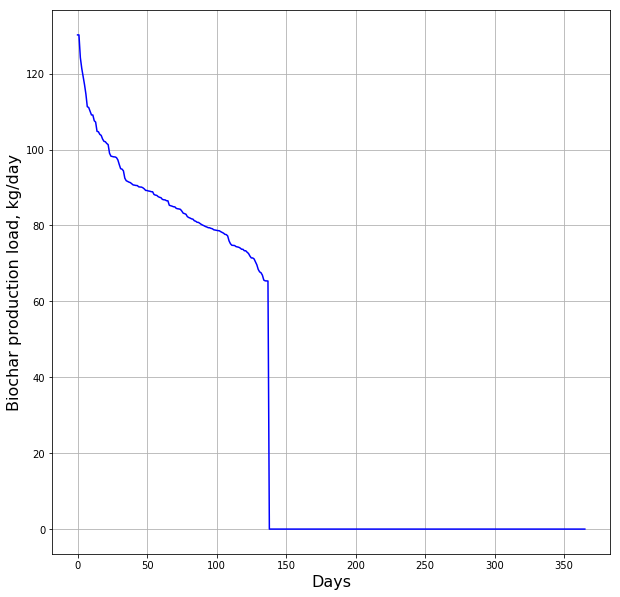

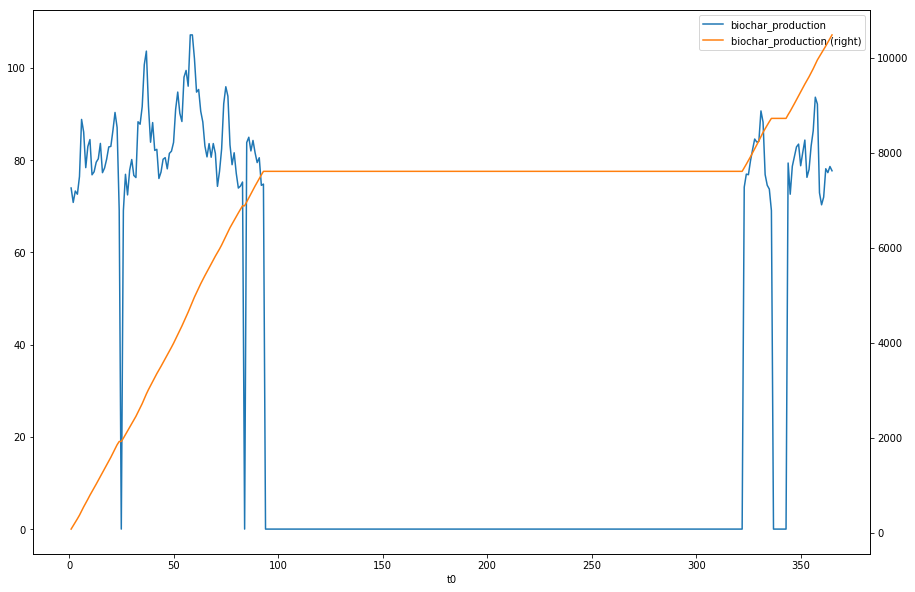

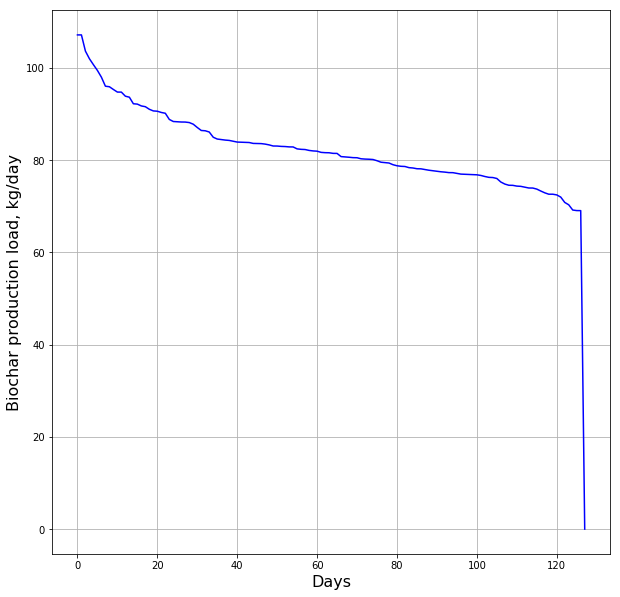

In [14]:
for scenario in list_to_rerun: #[2:3]:
    plantsAvailable=ofInterest_dict[scenario]
    ficus_scenario = scenario+'.xlsx'
    result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)

    # printing final report and bw2-LCA
    lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+ficus_scenario, year, p2e, 
                          plantsAvailable, ficus_folder, ficus_file, scenario,
                          proj, fg_db, fresh_db=False, plantEmissions=True, plantManufacturing=True)

###  Inventory table

In [43]:
#import df
a = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/'+'results/logfile.csv'
df = pd.read_csv(a, sep = ',', decimal = '.', parse_dates=True)

In [44]:
def read_single_feature(df, slt, feat='biochar production'):
    df.sort_values('scenario_name', inplace=True)
    y = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains(feat)].value)
    return y

In [45]:
act

['farmEnergy_cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B3_Pyr30-HP-el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B4_Comb-HP-el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B5_GSHP30_el_2017',
 'farmEnergy_cpLCA_50kW_PL5MO7MWh186_B6_el_2017']

In [46]:
scen_list = [
     'cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_2017',
     'cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017',
     'cpLCA_50kW_PL5MO7MWh186_B3_Pyr30-HP-el_2017',
     'cpLCA_50kW_PL5MO7MWh186_B4_Comb-HP-el_2017',
     'cpLCA_50kW_PL5MO7MWh186_B5_GSHP30_el_2017',
     'cpLCA_50kW_PL5MO7MWh186_B6_el_2017',
]
feat_list = ['pellet input',
             'pyrBMC50t elec input', 'pyrBMC30t elec input','hp elec input', 
             'el. heater elec input', 'comb elec input', 'gshp30 elec input',
             'biochar production',
             'pyrBMC50t heat produced','pyrBMC30t heat produced','hp heat produced',
             'el. heater heat produced', 'comb heat produced', 'gshp30 heat produced',
            ]

In [47]:
paper_df = pd.DataFrame({})
LHV_pellets = 18/3.6 # kWh/kg dry pellets
for f in feat_list:
    dic = {}
    for s in scen_list:
        y = read_single_feature(df, slt=s, feat=f)
        if 'elec input' in f:
            y=y/1000
        if 'pellet input' in f:
            y=y/LHV_pellets/1000
        # y[-1] = takes the last element of y, in case same scenario run multiple times, take most recent value
        t = ("%.2f" % y[-1]) if len(y) > 0 else '-'
        dic[s]=t
    paper_df[f]=dic.values()

    
paper_df['index']=dic.keys()
paper_df.set_index('index', inplace=True)

In [48]:
paper_df.transpose()

index                    cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_2017  \
pellet input                                                 39.40   
pyrBMC50t elec input                                          6.50   
pyrBMC30t elec input                                             -   
hp elec input                                                13.82   
el. heater elec input                                        12.96   
comb elec input                                                  -   
gshp30 elec input                                                -   
biochar production                                            7.98   
pyrBMC50t heat produced                                   91296.18   
pyrBMC30t heat produced                                          -   
hp heat produced                                          56648.35   
el. heater heat produced                                  12955.28   
comb heat produced                                               -   
gshp30 heat produced                                             -   

index                    cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017  \
pellet input                                              39.40   
pyrBMC50t elec input                                       6.50   
pyrBMC30t elec input                                          -   
hp elec input                                                 -   
el. heater elec input                                     69.60   
comb elec input                                               -   
gshp30 elec input                                             -   
biochar production                                         7.98   
pyrBMC50t heat produced                                91296.18   
pyrBMC30t heat produced                                       -   
hp heat produced                                              -   
el. heater heat produced                               69603.63   
comb heat produced                                            -   
gshp30 heat produced                                          -   

index                    cpLCA_50kW_PL5MO7MWh186_B3_Pyr30-HP-el_2017  \
pellet input                                                   48.15   
pyrBMC50t elec input                                               -   
pyrBMC30t elec input                                            7.95   
hp elec input                                                   5.87   
el. heater elec input                                          10.96   
comb elec input                                                    -   
gshp30 elec input                                                  -   
biochar production                                              9.75   
pyrBMC50t heat produced                                            -   
pyrBMC30t heat produced                                    125901.63   
hp heat produced                                            24038.61   
el. heater heat produced                                    10959.57   
comb heat produced                                                 -   
gshp30 heat produced                                               -   

index                    cpLCA_50kW_PL5MO7MWh186_B4_Comb-HP-el_2017  \
pellet input                                                  21.55   
pyrBMC50t elec input                                              -   
pyrBMC30t elec input                                              -   
hp elec input                                                 13.82   
el. heater elec input                                         12.96   
comb elec input                                                3.77   
gshp30 elec input                                                 -   
biochar production                                                -   
pyrBMC50t heat produced                                           -   
pyrBMC30t heat produced                                           -   
hp heat produced                                           56648.35   
el. heater

### Sensitivity analysis: electricity grid x biochar stability

#### Function that does it all

In [102]:
def climate_score_auto(EF,BS, hp=1, SLT='cpLCA_50kW_PL5MO7MWh186_Pyr-HP-el_2017',result_pds=result_pds):
    '''Given a scenario name SLT, defines the climate impact of the scenario as a function of BS and EF
    Is an approximation of results calculated by bw2 routine, because: 
    - EF annual average, and not daily average
    - Biochar stability? Not exactly same amount of biochar reported in both... bw2 and logfile; is it approx. from bw2 graph, unit process
    '''

    df = pd.read_csv('C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/'+'results/logfile.csv',
                     sep = ',', decimal = '.', parse_dates=True)

    def read_single_feature_single_scenario(df, slt, feat):
        df.sort_values('scenario_name', inplace=True)
        y = np.array(df[df['scenario_name'].str.contains(slt) & df['feature'].str.contains(feat)].value)
        return y[0] if len(y)>0 else 0

    a = result_pds.loc[:,
               result_pds.
               columns.difference(['Impact','Units'])
              ][result_pds['Impact'].str.contains('GWP') 
                & result_pds['Scenario'].str.contains(SLT)]

    breakdown = {               
        'Biochar C sequestration':-1*1000*44/12*0.77*BS*read_single_feature_single_scenario(df, slt=SLT, feat='biochar production'),
        'Electrical heating':EF/1000*(read_single_feature_single_scenario(df, SLT, feat='el. heater elec input')),
        'Fuel production':a['Fuel production'].values[0],
        'Manufacturing':a['Manufacturing'].values[0],
        'Plant emissions':a['Plant emissions'].values[0],
        'Plant start-up':0,
        'Process electricity':EF/1000*(read_single_feature_single_scenario(df, SLT, feat='pyrBMC50t elec input')+
                                      hp*read_single_feature_single_scenario(df, SLT, feat='hp elec input')),
    }
    return a, breakdown, sum(breakdown.values())

In [100]:
bw2res, breakdown, score = climate_score_auto(EF=42.07,BS=0.8, SLT='cpLCA_50kW_PL5MO7MWh186_Pyr-HP-el_2017')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [107]:
bw2res

Carbon sequestration  Electrical heating  Fuel production  Manufacturing  \
15         -18722.286824          581.687923      6544.433656     269.536705   

    Plant emissions  Plant start-up  Process electricity  \
15         1.859302             0.0           882.531377   

                                             Scenario  other  
15  farmEnergy_cpLCA_50kW_PL5MO7MWh186_Pyr-HP-el_2017      0

In [108]:
pd.DataFrame().from_dict(breakdown, orient='index').transpose()

Biochar C sequestration  Electrical heating  Fuel production  \
0            -18722.286824          545.028464      6544.433656   

   Manufacturing  Plant emissions  Plant start-up  Process electricity  
0     269.536705         1.859302             0.0           855.022484

In [109]:
score, ' vs ', bw2res.sum(axis=1), 'delta:', bw2res.sum(axis=1)-score

(-10506.406212732138, ' vs ', 15   -10442.237861
 dtype: float64, 'delta:', 15    64.168351
 dtype: float64)

####  Figure

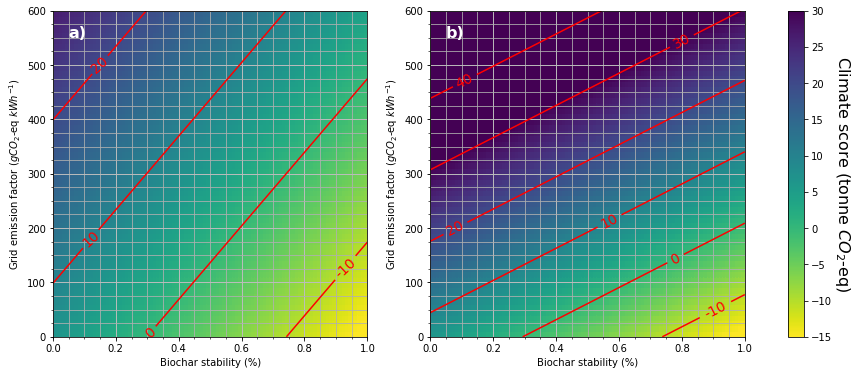

In [103]:
# make these smaller to increase the resolution
dEF, dBS = 10, 0.01

EF = np.arange(0,600+dEF,dEF) # from, to, by step
BS = np.arange(0.0,1 + dBS,dBS)


# figure: heat map + contour


# heatmap
n_col = 2
fig, ax = plt.subplots(1, n_col,
                       figsize=(15.5,6), sharex=True, sharey=False)

list_scen=[
    'cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_',
    'cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017'
]
pos=['a)','b)']

for i in range(2):
    r = i//n_col
    c = i%n_col

    X,Y = np.meshgrid(EF, BS)
    trash, trash, Z =climate_score_auto(X,Y, SLT=list_scen[i])
    Z=Z/1000

    im = ax[i].pcolormesh(Y,X,Z, cmap='viridis_r', vmin=-15, vmax=+30) #PiYG_r seismic_r
    if i == 1:
        cbar = fig.colorbar(mappable=im, ax=ax)
        cbar.set_label(r'Climate score (tonne $CO_2$-eq)', rotation=270, fontsize=16, labelpad=20)

    #contour
    class nf(float):
        def __repr__(self):
            s = f'{self:.1f}'
            return f'{self:.0f}' if s[-1] == '0' else s

    CS = ax[i].contour(Y, X, Z, [-20,-10, 0, 10, 20, 30, 40], colors=['red','red']) # Y, X, Z 

    CS.levels = [nf(val) for val in CS.levels]

    # Label levels with specially formatted floats
    if plt.rcParams["text.usetex"]:
        fmt = r'%r '
    else:
        fmt = '%r'
    ax[i].clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=14)


    # X ticks
    major_ticks = np.arange(0, 1+0.20, 0.20)
    minor_ticks = np.arange(0, 1+0.05, 0.05)
    ax[i].set_xticks(major_ticks)
    ax[i].set_xticks(minor_ticks, minor=True)

    # Y ticks
    major_ticks = np.arange(0, 600+100, 100)
    minor_ticks = np.arange(0, 600+25, 25)
    ax[i].set_yticks(major_ticks)
    ax[i].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax[i].grid(which='both')
    ax[i].grid(True, color='white')

    # a / b    
    ax[i].annotate(pos[i], color='white', weight='bold', fontsize=16, xy=(0.05,550))
    
    #plt.ylabel('Grid emission factor (gCO2-eq/kWh)', fontsize=16)

    i = i+1


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in ax.flat:
    ax.set(xlabel='Biochar stability (%)', ylabel= r'Grid emission factor ($gCO_2$-eq $kWh^{-1}$)')    
    #ax.label_outer()

# Add single dots
#plt.scatter(0.8, 300, c='royalblue', marker=6, alpha=0.8)

plt.show()

### Average grid EF with our data & Underestimation without refinement

In [36]:
corr = fb.get_ecoinventMix() # correspondance table

In [37]:
folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar'+'/farm_bw2/data/'
file='powermix-se.xlsx'
MD = pd.ExcelFile(folder+file).parse('powermix-se_tweak_app',index_col=[0],usecols='A:L').fillna(0)
MD = MD.resample('D').mean()
#MD = MD.reset_index(drop=False) #  daily mix, in % MW
MD_ei = MD.dot(corr.transpose()) # dailymix, in % MW, in Ecoinvent class # check sum: .sum(axis=1)
EF_ei = pd.ExcelFile(folder+file).parse('correspondance-table',index_col=[0],usecols='N:O').fillna(0)

In [40]:
grid_EF_daily = EF_ei.T.dot(MD_ei.T).T #lots of tranpose... daily EF with ecoinvent processes
grid_EF_daily.head()

('IPCC 2013', 'climate change', 'GWP 100a')
datetime                                               
2018-01-01                                    72.096471
2018-01-02                                    63.588599
2018-01-03                                    49.403819
2018-01-04                                    55.501493
2018-01-05                                    60.782283

In [59]:
q = stats.describe(grid_EF_daily)
AVG_EF = q[2][0]
q, AVG_EF

(DescribeResult(nobs=365, minmax=(array([20.63118896]), array([90.21507494])), mean=array([42.07885254]), variance=array([188.96727497]), skewness=array([0.62334525]), kurtosis=array([-0.10217138])),
 42.07885253923626)

In [104]:
list_scen=[
    'cpLCA_50kW_PL5MO7MWh186_B1_Pyr-HP-el_',
    'cpLCA_50kW_PL5MO7MWh186_B2_Pyr-el_2017'
]
i=0
a, b, c = climate_score_auto(EF=42.07,BS=0.89, SLT=list_scen[i])
a.sum(axis=1)-c

15    64.168351
dtype: float64

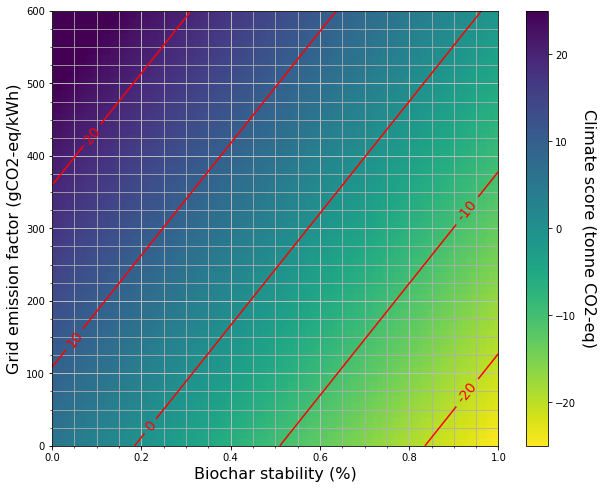

In [69]:
# make these smaller to increase the resolution
dEF, dBS = 10, 0.01

EF = np.arange(0,600+dEF,dEF) # from, to, by step
BS = np.arange(0.0,1 + dBS,dBS)

X,Y = np.meshgrid(EF, BS)
Z =climate_score_nohp(X,Y)

# figure: heat map + contour


# heatmap
fig, ax = plt.subplots(figsize=(10,8))
im = ax.pcolormesh(Y,X,Z, cmap='viridis_r', vmin=-25, vmax=+25) #PiYG_r seismic_r
cbar = fig.colorbar(mappable=im, ax=ax)
cbar.set_label('Climate score (tonne CO2-eq)', rotation=270, fontsize=16, labelpad=20)

#contour
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

CS = ax.contour(Y, X, Z, [-20,-10, 0, 10, 20], colors=['red','red']) # Y, X, Z 

CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r '
else:
    fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=14)


# X ticks
major_ticks = np.arange(0, 1+0.20, 0.20)
minor_ticks = np.arange(0, 1+0.05, 0.05)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# Y ticks
major_ticks = np.arange(0, 600+100, 100)
minor_ticks = np.arange(0, 600+25, 25)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax.grid(True, color='white')

#ax.set_title('Climate score sensitivity analysis', fontsize=14)
plt.xlabel('Biochar stability (%)', fontsize=16)
plt.ylabel('Grid emission factor (gCO2-eq/kWh)', fontsize=16)

# Add single dots
#plt.scatter(0.8, 300, c='royalblue', marker=6, alpha=0.8)

plt.show()

## Simulation X) Biomass comparison

### Prepare data

In [8]:
act = [a['name'] for a in bw2.Database(fg_db)
       if "farmEnergy_cpBIO_50kW_PL5MO7MWh186_" in str(a)
       and not "loop" in str(a)] 
act

['farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b32017',
 'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b42017',
 'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b22017',
 'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b52017',
 'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b12017']

In [9]:
fus = [ {(fg_db, x):1} for x in act]
fus

[{('farmEnergySystem',
   'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b32017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b42017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b22017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b52017'): 1},
 {('farmEnergySystem',
   'farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b12017'): 1}]

In [10]:
result_sets = []
result_pds = pd.DataFrame()
# loop on FUs
for fu in fus:
    #lci, lcia
    scores = []
    for n, m in enumerate(methods):
        if n == 0:
            lca = bw2.LCA(fu, m)
            lca.lci()
            lca.lcia()
        else:
            lca.switch_method(m)
            lca.redo_lcia(
            )
        scores.append(lca.score)
    scores
    
    #graph traversal
    multi_foreground_result, multi_foreground_graph = analysis.multi_traverse_tagged_databases(fu, methods, 
                                                                                      label="tag", default_tag="other", 
                                                                                      secondary_tags=[])

    recursed_graph = analysis.get_cum_impact(analysis.deepcopy(multi_foreground_graph[0]))
    dropped_graph = analysis.drop_pass_through_levels(analysis.deepcopy(multi_foreground_graph[0]))
    mass_flow = analysis.recurse_mass(multi_foreground_graph[0], True)

    result_set = {
            'methods': [str(method) for method in methods],
            'units': method_units,
            'scores': scores,
            'foreground_results': multi_foreground_result,
            'graph': recursed_graph,
            'dropped_graph': dropped_graph,
        }

    result_sets.append(result_set)

    result_pd = pd.DataFrame.from_dict(multi_foreground_result)
    
    result_pd['Impact'] = [str(method) for method in methods]
    result_pd['Units'] = method_units
    result_pd['Scenario'] = np.repeat(list(fu.items())[0][0][1], len(method_units))
   
    result_pds = result_pds.append(result_pd, sort=False) # works even if not same axis (different tags)
    
result_pds

other  Carbon sequestration  Plant emissions  Process electricity  \
0       61.783239             -0.000000        52.951783             4.272471   
1     6722.006302             -0.000000         0.000000           567.995493   
2        2.203211             -0.000000         0.000000             0.330905   
3       18.185794             -0.000000        27.835464             1.142544   
4      183.081952             -0.000000       304.830532            10.354497   
5        0.000109             -0.000000         0.000000             0.000018   
6      320.869876             -0.000000         0.000000          7256.000095   
7        0.001206             -0.000000         0.000000             0.000262   
8        0.000637             -0.000000         0.000000             0.000497   
9       24.793784             -0.000000        71.609513             2.415826   
10       0.000410             -0.000000         0.000952             0.000047   
11    4139.582910             -0.000000         0.000000          3658.263665   
12   70690.745445             -0.000000         0.000000        113943.120132   
13  255684.904156             -0.000000         0.000000        100868.183866   
14       0.070221             -0.000000         0.000000             0.002190   
15   10004.165151         -20855.090020         1.859302           827.977636   
0        0.000000             -0.000000        52.951783             4.272471   
1        0.000000             -0.000000         0.000000           567.995493   
2        0.000000             -0.000000         0.000000             0.330905   
3        0.000000             -0.000000        27.835464             1.142544   
4        0.000000             -0.000000       304.830532            10.354497   
5        0.000000             -0.000000         0.000000             0.000018   
6        0.000000             -0.000000         0.000000          7256.000095   
7        0.000000             -0.000000         0.000000             0.000262   
8        0.000000             -0.000000         0.000000             0.000497   
9        0.000000             -0.000000        71.609513             2.415826   
10       0.000000             -0.000000         0.000952             0.000047   
11       0.000000             -0.000000         0.000000          3658.263665   
12       0.000000             -0.000000         0.000000        113943.120132   
13       0.000000             -0.000000         0.000000        100868.183866   
..            ...                   ...              ...                  ...   
2        0.000000             -0.000000         0.000000             0.330905   
3       -2.766811             -0.000000        27.835464             1.142544   
4     -405.097248             -0.000000       304.830532            10.354497   
5        0.000000             -0.000000         0.000000             0.000018   
6        0.000000             -0.000000         0.000000          7256.000095   
7        0.000000             -0.000000         0.000000             0.000262   
8        0.000000             -0.000000         0.000000             0.000497   
9       -0.433925             -0.000000        71.609513             2.415826   
10      -0.000421             -0.000000         0.000952             0.000047   
11    -230.657106             -0.000000         0.000000          3658.263665   
12       0.000000             -0.000000         0.000000        113943.120132   
13       0.000000             -0.000000         0.000000        100868.183866   
14       0.000000             -0.000000         0.000000             0.002190   
15   -1508.857287         -20048.926876         1.859302           827.977636   
0        0.000000             -0.000000        52.951783             4.272471   
1        0.000000             -0.000000         0.000000           567.995493   
2        0.000000             -0.000000         0.000000             0.330905   
3        0.000000             -0.000000    

In [11]:
result_pds.loc[:,result_pds.columns.difference(['Impact','Units'])][result_pds['Impact'].str.contains('GWP')]

Carbon sequestration  Electrical heating  Fuel production  Manufacturing  \
15         -20855.090020          581.687923         0.000000     269.536705   
15         -20855.090020          581.687923      2322.927077     269.536705   
15         -20855.090020          581.687923      1727.133207     269.536705   
15         -20048.926876          581.687923         0.000000     269.536705   
15         -16555.308505          581.687923      5408.684614     269.536705   

    Plant emissions  Plant start-up  Process electricity  \
15         1.859302               0           827.977636   
15         1.859302               0           827.977636   
15         1.859302               0           827.977636   
15         1.859302               0           827.977636   
15         1.859302               0           827.977636   

                                             Scenario  foreground_SOC  \
15  farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b...    -36808.52688   
15  farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b...             NaN   
15  farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b...             NaN   
15  farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b...             NaN   
15  farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b...             NaN   

    foreground_Soil N2O         other  
15          13877.50437  10004.165151  
15                  NaN      0.000000  
15                  NaN      0.000000  
15                  NaN  -1508.857287  
15                  NaN      0.000000

In [12]:
result_pds.loc[:,['Scenario']][result_pds['Impact'].str.contains('GWP')].values

array([['farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b32017'],
       ['farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b42017'],
       ['farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b22017'],
       ['farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b52017'],
       ['farmEnergy_cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b12017']],
      dtype=object)

### Figure

C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  del sys.path[0]


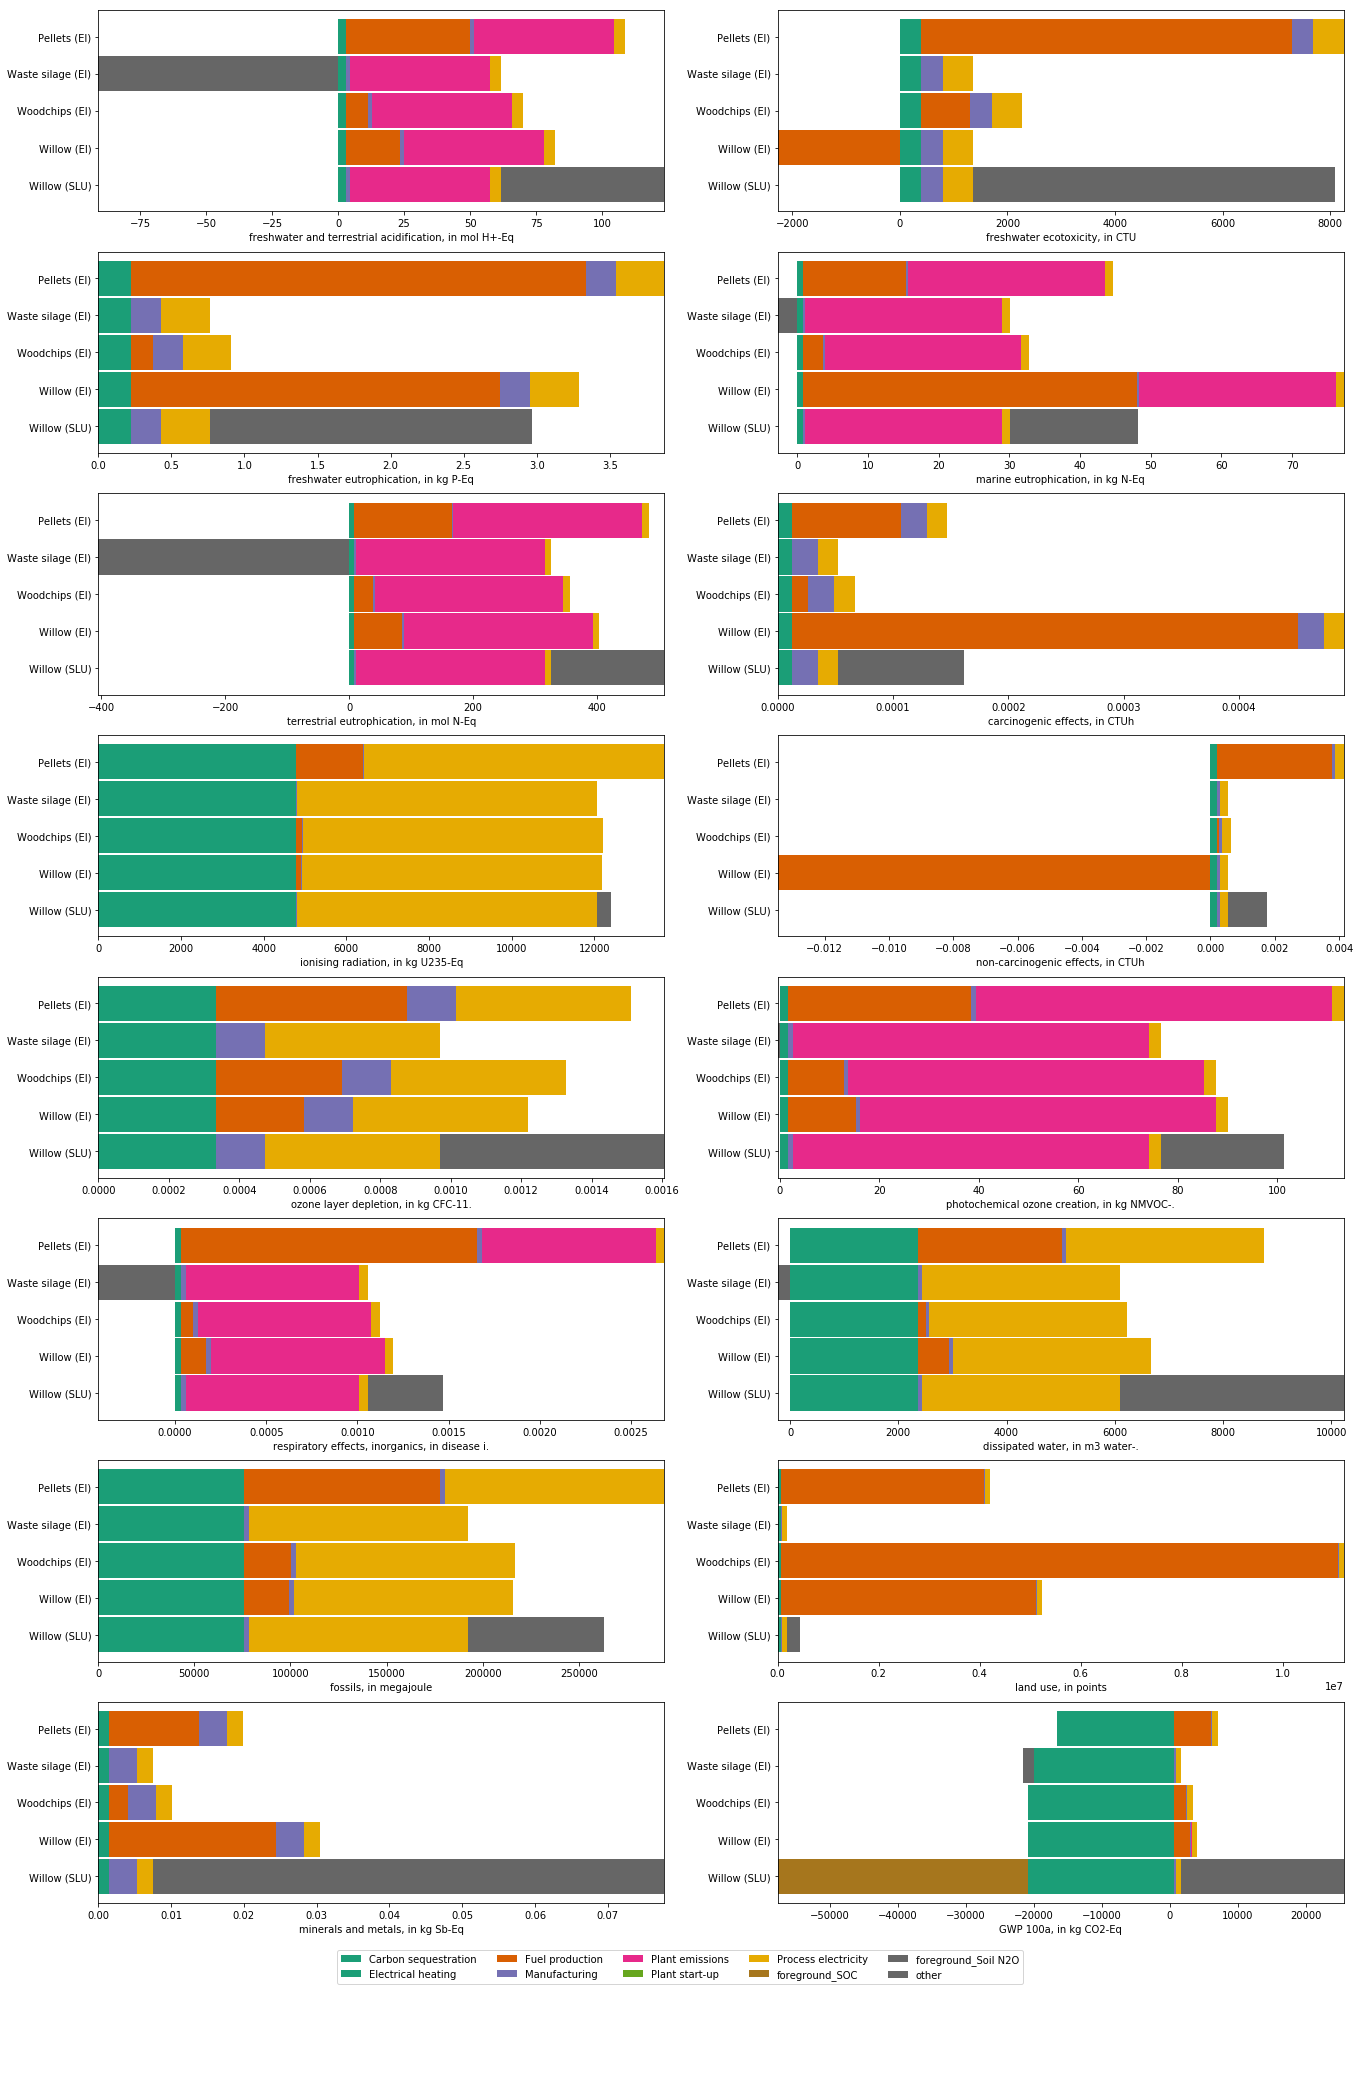

In [14]:
paper_name =['Willow (SLU)', 'Willow (EI)', 'Woodchips (EI)', 'Waste silage (EI)', 'Pellets (EI)' ] # act #
n_col = 2
fig, axs = plt.subplots(int(len(methods)/n_col),n_col, 
                        figsize=(20,3.8*int(len(methods)/n_col)),
                        sharex=False)
method_name_unit = [methods[x][2]+', in '+method_units[x] for x in range(len(methods))]
i=0
for m in methods:
    r = i//n_col
    c = i%n_col
    m = str(m)
    # remove non result columns, and filter by impact category m
    tmp = result_pds.loc[:,result_pds.columns.difference(['Impact','Scenario','Units'])][result_pds['Impact'].str.contains(m)]
    plus = tmp[tmp>=0].sum(axis=1)
    moins = tmp[tmp<0].sum(axis=1)
    tmp.plot(kind='barh', stacked=True, ax=axs[r,c],
            colormap='Dark2', # viridis Pastel2 Paired tab20c
            xlim=(min(moins),max(plus)),#to change
            rot=0,
            width=0.95)
    axs[r,c].set_xlabel(method_name_unit[i])
    axs[r,c].set_yticklabels(paper_name)
    
    axs[r,c].legend().set_visible(False)
    #tmp = pd.DataFrame()
    i=i+1

handles, labels = axs[(i-1)//n_col,(i-1)%n_col].get_legend_handles_labels()
fig.legend(handles, labels, 
           #bbox_to_anchor=(0.06, 0.79, 0.75, 0.1), 
           loc='lower center',         
           ncol=5, 
           #mode="expand", 
           borderaxespad=10)
plt.subplots_adjust(top=0.99, right=0.99)

plt.savefig('cpBIO_LCIA.png', dpi=300)

In [16]:
scen_list = ['cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b1',
             'cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b2',
             'cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b3',
             'cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b4',
             'cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b5']
bio_LHV_dry = [18.35, 17.89, 17.89, 17.89, 17.0]
feat_list = ['pellet input','biochar production',
             'hp elec input', 'el. heater elec input','pyrBMC50t_b1 elec input', 
             'pyrBMC50t_b2 elec input', 'pyrBMC50t_b3 elec input','pyrBMC50t_b4 elec input','pyrBMC50t_b5 elec input',
             'hp heat produced', 'el. heater heat produced', 'pyrBMC50t_b1 heat produced',
             'pyrBMC50t_b2 heat produced','pyrBMC50t_b3 heat produced','pyrBMC50t_b4 heat produced','pyrBMC50t_b5 heat produced',
            ]

In [34]:
#import df
a = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/'+'results/logfile.csv'
df = pd.read_csv(a, sep = ',', decimal = '.', parse_dates=True)

paper_df = pd.DataFrame({})
for f in feat_list:
    dic = {}
    for s in scen_list:
        i=0
        y = read_single_feature(df, slt=s, feat=f)
        if 'elec input' in f:
            y=y/1000
        if 'pellet input' in f:
            print(y[-1])
            y=y/1000          
        # y[-1] = takes the last element of y, in case same scenario run multiple times, take most recent value
        t = ("%.5f" % y[-1]) if len(y) > 0 else '-'
        dic[s]=t
        i=i+1
    paper_df[f]=dic.values()

    
paper_df['index']=dic.keys()
paper_df.set_index('index', inplace=True)

165993.04898901135
202880.3932087918
202880.3932087918
202880.3932087918
202880.3932087918


In [35]:
paper_df.transpose()

index                      cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b1  \
pellet input                                          165.99305   
biochar production                                      6.58848   
hp elec input                                          13.82220   
el. heater elec input                                  12.95528   
pyrBMC50t_b1 elec input                                 5.47777   
pyrBMC50t_b2 elec input                                       -   
pyrBMC50t_b3 elec input                                       -   
pyrBMC50t_b4 elec input                                       -   
pyrBMC50t_b5 elec input                                       -   
hp heat produced                                    56648.35474   
el. heater heat produced                            12955.27607   
pyrBMC50t_b1 heat produced                          91296.17694   
pyrBMC50t_b2 heat produced                                    -   
pyrBMC50t_b3 heat produced                                    -   
pyrBMC50t_b4 heat produced                                    -   
pyrBMC50t_b5 heat produced                                    -   

index                      cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b2  \
pellet input                                          202.88039   
biochar production                                      8.29965   
hp elec input                                          13.82220   
el. heater elec input                                  12.95528   
pyrBMC50t_b1 elec input                                       -   
pyrBMC50t_b2 elec input                                 5.47777   
pyrBMC50t_b3 elec input                                       -   
pyrBMC50t_b4 elec input                                       -   
pyrBMC50t_b5 elec input                                       -   
hp heat produced                                    56648.35474   
el. heater heat produced                            12955.27607   
pyrBMC50t_b1 heat produced                                    -   
pyrBMC50t_b2 heat produced                          91296.17694   
pyrBMC50t_b3 heat produced                                    -   
pyrBMC50t_b4 heat produced                                    -   
pyrBMC50t_b5 heat produced                                    -   

index                      cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b3  \
pellet input                                          202.88039   
biochar production                                      8.29965   
hp elec input                                          13.82220   
el. heater elec input                                  12.95528   
pyrBMC50t_b1 elec input                                       -   
pyrBMC50t_b2 elec input                                       -   
pyrBMC50t_b3 elec input                                 5.47777   
pyrBMC50t_b4 elec input                                       -   
pyrBMC50t_b5 elec input                                       -   
hp heat produced                                    56648.35474   
el. heater heat produced                            12955.27607   
pyrBMC50t_b1 heat produced                                    -   
pyrBMC50t_b2 heat produced                                    -   
pyrBMC50t_b3 heat produced                          91296.17694   
pyrBMC50t_b4 heat produced                                    -   
pyrBMC50t_b5 heat produced                                    -   

index                      cpBIO_50kW_PL5MO7MWh186_pyrBMC50t_b4  \
pellet input                                          202.88039   
biochar production                                      8.29965   
hp elec input                                          13.82220   
el. heater elec input                                  12.95528   
pyrBMC50t_b1 elec input                                       -   
pyrBMC50t_b2 elec input                                       -   
pyrBMC50t_b3 elec input                                       -   
pyrBMC50t_b4 elec input                     